# Análise dos Modelos

Feito por: João Pedro Tiellet Demari e Lucca Paradeda

Neste notebook, vamos fazer a análise da resposta do ChatGPT para os modelos de aprendizado de máquina: KNN, Naive Bayes e Decision Tree.


# KNN - K-Nearest Neighbors

---

Vamos começar com a análise do algorítmo KNN.

Para essa análise e verificação do funcionamento do algoritmo, vamos utilizar o dataset de pessoas que sobreviveram ao Titanic. (I'm the king of the world! 🚢)

Link do Dataset: https://www.kaggle.com/datasets/brendan45774/test-file


In [32]:
import pandas as pd

titanic_dataset = pd.read_csv('titanic.csv', index_col=[0])

In [33]:
titanic_dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Pré-processamento dos dados

Como gostariamos de uma base de dados mais limpa para fazer a análise e o foco do trabalho não é a limpeza de dados, pegamos esse script pronto

_Fonte:_ https://www.kaggle.com/code/elhaddadmohamed/titanic-survival-prediction-logistic-regression


In [35]:
from sklearn.preprocessing import LabelEncoder


titanic_dataset.dropna(subset=['Embarked'], inplace=True)

labelencoder = LabelEncoder()
titanic_dataset['Sex'] = labelencoder.fit_transform(titanic_dataset['Sex'])
titanic_dataset['Embarked'] = labelencoder.fit_transform(titanic_dataset['Embarked'])

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
Xoriginal = titanic_dataset[features]
yoriginal = titanic_dataset['Survived']
X = Xoriginal.values
y = yoriginal.values

# Prompt ChatGPT KNN

[Link da Conversa do ChatGPT](https://chatgpt.com/share/66edd3f9-4a84-800b-976e-81c99eb31c0d)

"Preciso que você me forneça a implementação do algoritmo KNN, para que eu possa adicionar em meu notebook python e analisar dados de um csv. Você não pode utilizar bibliotecas como scikit-learn, tem que fazer uma implementação "from scratch", apenas pode utilizar bibliotecas auxiliares como numpy. Preciso também conseguir fazer o teste desse modelo com: matriz de confusão, acurácia, recall, precisão e f1-score."

# Resposta ChatGPT KNN

## Passo 1: Importar bibliotecas necessárias


In [36]:
import numpy as np
from collections import Counter

## Passo 2: Implementação do KNN


In [37]:
class KNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)
    
    def _predict(self, x):
        # Calcula a distância euclidiana de x para todos os exemplos no conjunto de treino
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        # Ordena as distâncias e pega os k exemplos mais próximos
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # A classe mais comum entre os k vizinhos é a previsão
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

## Passo 3: Funções de Avaliação

1. Matriz de Confusão


In [38]:
def confusion_matrix(y_true, y_pred):
    unique_classes = np.unique(y_true)
    matrix = np.zeros((len(unique_classes), len(unique_classes)))
    
    for true_label, predicted_label in zip(y_true, y_pred):
        matrix[int(true_label)][int(predicted_label)] += 1
    
    return matrix

2. Acurácia


In [39]:
def accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    return correct_predictions / len(y_true)

3. Precisão, Recall e F1-Score


In [40]:
def precision(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    precisions = []
    
    for i in range(len(matrix)):
        tp = matrix[i][i]
        fp = np.sum(matrix[:, i]) - tp
        if tp + fp == 0:
            precisions.append(0)
        else:
            precisions.append(tp / (tp + fp))
    
    return np.mean(precisions)

def recall(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    recalls = []
    
    for i in range(len(matrix)):
        tp = matrix[i][i]
        fn = np.sum(matrix[i, :]) - tp
        if tp + fn == 0:
            recalls.append(0)
        else:
            recalls.append(tp / (tp + fn))
    
    return np.mean(recalls)

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    if p + r == 0:
        return 0
    return 2 * (p * r) / (p + r)

## Passo 4: Teste com Dados CSV

Aqui está como você pode carregar um CSV e testar o modelo:


In [41]:
from sklearn.model_selection import train_test_split

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar e treinar o modelo KNN
knn = KNN(k=3)
knn.fit(X_train, y_train)

# Fazer as previsões
y_pred = knn.predict(X_test)

# Avaliar o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print(f"Acurácia: {accuracy(y_test, y_pred):.4f}")
print(f"Precisão: {precision(y_test, y_pred):.4f}")
print(f"Recall: {recall(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

Matriz de Confusão:
[[38. 12.]
 [21. 13.]]
Acurácia: 0.6071
Precisão: 0.5820
Recall: 0.5712
F1-Score: 0.5766


# Análise do KNN gerado pelo ChatGPT

---

## Pontos Fortes

Primeiramente, é importante destacar que o ChatGPT fez o que foi pedido, gerou-se a implementação do KNN, que ocorre exatamente no passo a passo descrito nas aulas:

1. Calcula a distância euclidiana para todos os exemplos no conjunto de treino
2. Ordena essas distâncias
3. Pega os k exemplos mais próximos
4. Deterina que a previsão é a moda entre os k vizinhos

Por isso, se cumpriu a proposta do prompt, implementar o KNN e utilizar os meios indicados de validação.

Outro ponto forte é que o ChatGPT cria um código enxuto, sabendo utilizar bem todas as ferramentas do Python e as ferramentas da biblioteca que foi permitida(Numpy). Um código gerado em 5 linhas. Um iniciante por exemplo implementaria um código muito mais longo.

## Potenciais problemas/diferenças

Acho importante ressaltar que tivemos um erro ao rodar o programa na primeira vez. Como fizemos o pré-processamento sem utilizar o ChatGPT, ele não sabia que deveríamos dar um .values no conjunto X de atributos e no conjunto Y de respostas, tivemos que descobrir isso enviando o erro e fazendo com que ele solucionasse o problema.

A acurácia foi de 60% na implementação nossa, o que não é uma boa acurácia. Porém devemos prestar atenção ao fato de que não foi passado nenhum parâmetro diferente dos vizinhos.

Outro ponto fraco é que ele utiliza apenas a distância Euclidiana. É uma distância simples e funcional e não foi especificado qual distância deveria ser utilizada no prompt. Porém, existem distâncias mais completas, como por exemplo a Distância de Mahalanobis.

A Distância de Mahalanobis calcula a distância entre uma instância ao centro de um grupo de instâncias e poderia ter sido utilizada para uma outra análise no conjunto de dados.

Por essas diferenças, é interessante perceber que não é preciso reinventar a roda. As bibliotecas, como scikit-learn, já estão prontas para uso, possuem um número imenso de parâmetros que podem ajudar a refinar o modelo e demoraram anos de bugs e melhorias para serem construídas. São ferramentas mais poderosas para aprendizado de máquina do que implementar seu próprio modelo. Além disso, já foram otimizadas e rodam muito mais rápido para grandes conjuntos de dados.

___

# Naive Bayes

Nosso segundo modelo a ser analisado é o Naive Bayes.

# Prompt ChatGPT Naive Bayes

[Link da Conversa no ChatGPT](https://chatgpt.com/share/66edd8bd-5ca0-800b-b6d7-4d2e3e12ec0d)

"Preciso que você me forneça a implementação do algoritmo Naive Bayes, para que eu possa adicionar em meu notebook python e analisar dados de um csv. Você não pode utilizar bibliotecas como scikit-learn, tem que fazer uma implementação "from scratch", apenas pode utilizar bibliotecas auxiliares como numpy. Preciso também conseguir fazer o teste desse modelo com: matriz de confusão, acurácia, recall, precisão e f1-score."

# Resposta ChatGPT Naive Bayes

Ao contrário do KNN, o ChatGPT gerou todos os códigos pedidos para executar e validar o Naive Bayes de uma vez só.


In [42]:
import numpy as np

class NaiveBayes:
    def __init__(self):
        self.classes = None
        self.mean = None
        self.var = None
        self.priors = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        
        # Inicializando mean, var e prior para cada classe
        self.mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self.var = np.zeros((n_classes, n_features), dtype=np.float64)
        self.priors = np.zeros(n_classes, dtype=np.float64)
        
        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.var[idx, :] = X_c.var(axis=0)
            self.priors[idx] = X_c.shape[0] / float(n_samples)
    
    def _pdf(self, class_idx, x):
        """Calcula a densidade de probabilidade usando a fórmula da gaussiana"""
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator
    
    def _class_likelihoods(self, x):
        """Calcula a probabilidade posterior para cada classe"""
        posteriors = []
        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            class_conditional = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + class_conditional
            posteriors.append(posterior)
        return posteriors
    
    def predict(self, X):
        """Faz a predição das classes"""
        y_pred = [self.classes[np.argmax(self._class_likelihoods(x))] for x in X]
        return np.array(y_pred)

# Funções auxiliares para avaliação
def confusion_matrix(y_true, y_pred):
    """Calcula a matriz de confusão"""
    classes = np.unique(y_true)
    matrix = np.zeros((len(classes), len(classes)), dtype=np.int64)
    
    for i, true_label in enumerate(y_true):
        pred_label = y_pred[i]
        matrix[true_label, pred_label] += 1
    
    return matrix

def accuracy(y_true, y_pred):
    """Calcula a acurácia"""
    return np.sum(y_true == y_pred) / len(y_true)

def precision(y_true, y_pred):
    """Calcula a precisão"""
    cm = confusion_matrix(y_true, y_pred)
    precisions = []
    for i in range(len(cm)):
        precisions.append(cm[i, i] / np.sum(cm[:, i]) if np.sum(cm[:, i]) > 0 else 0)
    return np.mean(precisions)

def recall(y_true, y_pred):
    """Calcula o recall"""
    cm = confusion_matrix(y_true, y_pred)
    recalls = []
    for i in range(len(cm)):
        recalls.append(cm[i, i] / np.sum(cm[i, :]) if np.sum(cm[i, :]) > 0 else 0)
    return np.mean(recalls)

def f1_score(y_true, y_pred):
    """Calcula o F1-score"""
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r) if (p + r) > 0 else 0

# Dividir os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = NaiveBayes()
model.fit(X_train, y_train)

# Fazer predições no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print(f"Acurácia: {accuracy(y_test, y_pred):.4f}")
print(f"Precisão: {precision(y_test, y_pred):.4f}")
print(f"Recall: {recall(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")


Matriz de Confusão:
[[50  0]
 [34  0]]
Acurácia: 0.5952
Precisão: 0.2976
Recall: 0.5000
F1-Score: 0.3731


C:\Users\User\AppData\Local\Temp\ipykernel_13432\2204387058.py:30: RuntimeWarning: invalid value encountered in divide
  numerator = np.exp(- (x - mean) ** 2 / (2 * var))
C:\Users\User\AppData\Local\Temp\ipykernel_13432\2204387058.py:30: RuntimeWarning: divide by zero encountered in divide
  numerator = np.exp(- (x - mean) ** 2 / (2 * var))
C:\Users\User\AppData\Local\Temp\ipykernel_13432\2204387058.py:32: RuntimeWarning: invalid value encountered in divide
  return numerator / denominator


# Análise Naive Bayes Gerado

___ 
## Pontos Fortes

O algoritmo Naive Bayes Gaussiano do ChatGPT é uma solução funcional dentro do que foi proposto no prompt. Ele segue o modelo visto em aula de classificação probabilística, utilizando a suposição de independência condicional entre as variáveis.

A implementação também faz o bom uso de operações vetorizadas do NumPy, o que melhora a eficiência computacional e torna o código mais rápido.

Além disso, o uso de log-probabilidades é uma boa prática para evitar problemas de underflow numérico, que podem ocorrer quando as probabilidades são muito pequenas e a multiplicação de vários números próximos de zero pode levar a erros de precisão. Assim é possível somar os log-probabilidades em vez de multiplicá-las diretamente, o que preserva a precisão e evita o risco de underflow.

## Áreas de Melhoria

Falta tratamento para situações como variância zero em features. Uma técnica comum para lidar com isso é a suavização de Laplace. A suavização de Laplace é uma técnica utilizada quando existe um atributo que tem um valor que nunca aconteceu. No cálculo da probabilidade, o resultado da divisão seria 0. A suavização de Laplace adiciona 1 ao numerador da fração, para que possa se considerar uma probabilidade daquele fato.

Além disso, o código assume que todas as features seguem uma distribuição Gaussiana, o que pode não ser sempre uma suposição apropriada, dependendo do tipo de dados que está sendo analisado. A suposição de que as variáveis independentes são normalmente distribuídas funciona bem para dados contínuos e simétricos, mas em muitos conjuntos de dados do mundo real, as features podem seguir distribuições diferentes.

## Comparação com Bibliotecas Estabelecidas

Bibliotecas como o scikit-learn oferecem modelos mais otimizados e amplamente testados, garantindo maior confiabilidade para uso em produção. Elas fornecem variantes do Naive Bayes, como o Multinomial e Bernoulli, adequadas para diferentes tipos de dados

## Conclusão Naive Bayes

Para que essa implementação seja aplicada em cenários do mundo real, seria necessário lidar com questões como a variância zero nas features e a suposição de distribuição gaussiana para todas as variáveis, o que pode não ser adequado para todos os tipos de dados. A inclusão de técnicas como suavização de Laplace, além de uma maior flexibilidade na escolha das distribuições de probabilidade para diferentes tipos de variáveis, tornaria o modelo mais robusto e aplicável a um número maior de problemas.

Esta implementação é muito útil para fins educacionais e experimentais, mas exigiria algumas melhorias e adaptações para se equiparar a soluções mais poderosas como o scikit-learn, especialmente em ambientes de produção.
___

# *Decision Tree*

Nosso terceiro modelo a ser analisado é a Árvore de Decisão (Decision Tree)

# Prompt ChatGPT Decision Tree

[Link da conversa com o ChatGPT](https://chatgpt.com/share/66eddba1-749c-800b-9256-0144ad3aa1f4)

"Preciso que você me forneça a implementação do algoritmo Decision Tree, para que eu possa adicionar em meu notebook python e analisar dados de um csv.

Você não pode utilizar bibliotecas como scikit-learn, tem que fazer uma implementação "from scratch", apenas pode utilizar bibliotecas auxiliares como numpy.

Preciso também conseguir fazer o teste desse modelo com: matriz de confusão, acurácia, recall, precisão e f1-score."

# Resposta ChatGPT Decision Tree

Para implementar uma árvore de decisão "from scratch" em Python, sem utilizar bibliotecas como scikit-learn, usaremos apenas bibliotecas auxiliares como numpy. O algoritmo de árvore de decisão funciona selecionando atributos que maximizam a separação das classes (usaremos o critério da Entropia e o Ganho de Informação).

Etapas:

1. Entropia e Ganho de Informação: A entropia mede o grau de desordem em um conjunto de dados. O ganho de informação mede a quantidade de redução de desordem ao dividir os dados em relação a um atributo.
2. Divisão de Dados: Durante o processo de construção da árvore, os dados são divididos com base no valor de um atributo.
3. Construção Recursiva: A árvore é construída recursivamente, escolhendo o melhor atributo a cada passo até que não haja mais divisão útil.
4. Teste do Modelo: Testaremos a árvore para realizar a previsão de novos dados.
5. Métricas: Implementaremos funções para calcular a matriz de confusão, acurácia, precisão, recall e F1-score.

### Implementação

Aqui está a implementação completa:


In [43]:
import numpy as np
from collections import Counter

# Função para calcular a entropia
def entropy(y):
    class_counts = np.bincount(y)
    probabilities = class_counts / len(y)
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Função para calcular o ganho de informação
def information_gain(X_column, y, threshold):
    # Dividir os dados com base no threshold
    left_idxs = X_column <= threshold
    right_idxs = X_column > threshold
    if sum(left_idxs) == 0 or sum(right_idxs) == 0:
        return 0

    # Peso de cada parte
    n = len(y)
    n_left, n_right = len(y[left_idxs]), len(y[right_idxs])
    p_left, p_right = n_left / n, n_right / n

    # Entropia ponderada das duas partes
    entropy_before = entropy(y)
    entropy_after = p_left * entropy(y[left_idxs]) + p_right * entropy(y[right_idxs])

    # Ganho de informação
    return entropy_before - entropy_after

# Classe nó da árvore
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature          # Índice do atributo
        self.threshold = threshold      # Valor de corte
        self.left = left                # Subárvore esquerda
        self.right = right              # Subárvore direita
        self.value = value              # Classe para o nó folha

    def is_leaf_node(self):
        return self.value is not None

# Implementação da Árvore de Decisão
class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.root = None

    def fit(self, X, y):
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Critérios de parada
        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        # Encontrar o melhor atributo e valor de corte
        best_feature, best_threshold = self._best_criteria(X, y, n_features)

        # Dividir os dados em dois subconjuntos
        left_idxs, right_idxs = self._split(X[:, best_feature], best_threshold)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feature, best_threshold, left, right)

    def _best_criteria(self, X, y, n_features):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feature_idx in range(n_features):
            X_column = X[:, feature_idx]
            thresholds = np.unique(X_column)

            for threshold in thresholds:
                gain = information_gain(X_column, y, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature_idx
                    split_threshold = threshold

        return split_idx, split_threshold

    def _split(self, X_column, threshold):
        left_idxs = X_column <= threshold
        right_idxs = X_column > threshold
        return np.argwhere(left_idxs).flatten(), np.argwhere(right_idxs).flatten()

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

# Funções para métricas
def confusion_matrix(y_true, y_pred):
    classes = np.unique(np.concatenate((y_true, y_pred)))
    matrix = np.zeros((len(classes), len(classes)))

    for true_label, pred_label in zip(y_true, y_pred):
        true_idx = np.where(classes == true_label)[0][0]
        pred_idx = np.where(classes == pred_label)[0][0]
        matrix[true_idx, pred_idx] += 1

    return matrix

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def precision(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    precisions = []
    for i in range(len(cm)):
        if np.sum(cm[:, i]) == 0:
            precisions.append(0)
        else:
            precisions.append(cm[i, i] / np.sum(cm[:, i]))
    return np.mean(precisions)

def recall(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    recalls = []
    for i in range(len(cm)):
        if np.sum(cm[i, :]) == 0:
            recalls.append(0)
        else:
            recalls.append(cm[i, i] / np.sum(cm[i, :]))
    return np.mean(recalls)

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    if (p + r) == 0:
        return 0
    return 2 * (p * r) / (p + r)

# Dividindo o conjunto de dados em treino e teste (80% treino, 20% teste)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
tree = DecisionTree(max_depth=10)
tree.fit(X_train, y_train)

# Prevendo no conjunto de teste
y_pred = tree.predict(X_test)

# Avaliando o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print(f"Acurácia: {accuracy(y_test, y_pred)}")
print(f"Precisão: {precision(y_test, y_pred)}")
print(f"Recall: {recall(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")


Matriz de Confusão:
[[50.  0.]
 [ 0. 34.]]
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1-Score: 1.0


# Teste com parâmetros diferentes


In [44]:
# Treinando o modelo
tree = DecisionTree(max_depth=2, min_samples_split=20)
tree.fit(X_train, y_train)

# Prevendo no conjunto de teste
y_pred = tree.predict(X_test)

# Avaliando o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print(f"Acurácia: {accuracy(y_test, y_pred)}")
print(f"Precisão: {precision(y_test, y_pred)}")
print(f"Recall: {recall(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")

Matriz de Confusão:
[[50.  0.]
 [ 0. 34.]]
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1-Score: 1.0


# Teste com a biblioteca SKLearn


In [45]:
from sklearn.tree import DecisionTreeClassifier

# Criar uma árvore de decisão com limite de profundidade e número mínimo de amostras por nó
model = DecisionTreeClassifier(max_depth=1, min_samples_split=4, min_samples_leaf=2)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo  
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print(f"Acurácia: {accuracy(y_test, y_pred)}")
print(f"Precisão: {precision(y_test, y_pred)}")
print(f"Recall: {recall(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")

Matriz de Confusão:
[[50.  0.]
 [ 0. 34.]]
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1-Score: 1.0


# Visualização da Árvore de Decisão


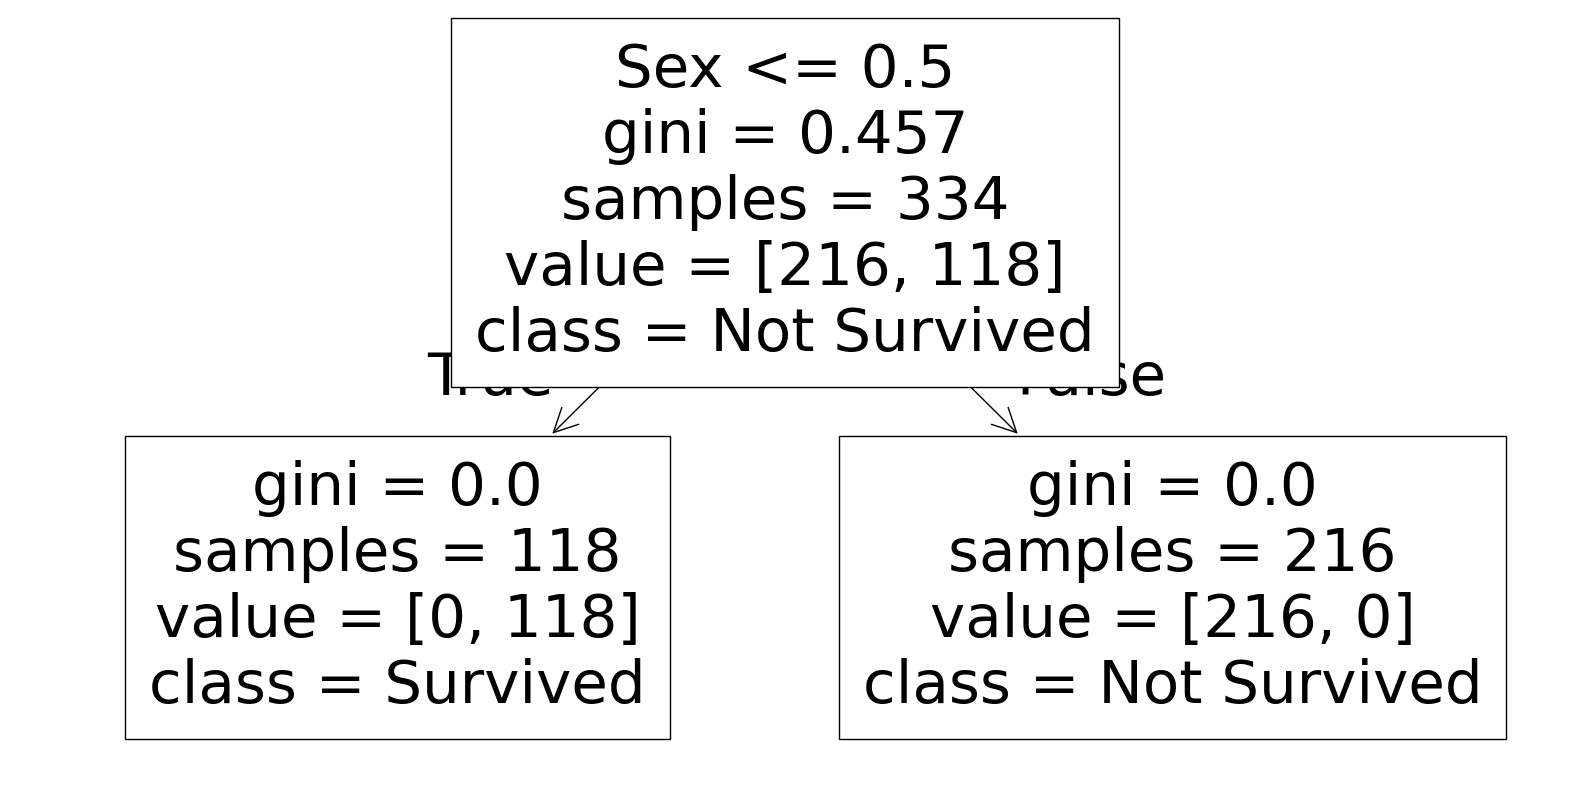

In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Cria uma figura grande para visualizar a árvore
plt.figure(figsize=(20, 10))

# Plota a árvore
plot_tree(model, filled=False, feature_names=Xoriginal.columns, class_names=['Not Survived', 'Survived'])

# Exibe o gráfico
plt.show()

# Análise Decision Tree
___

## Pontos fortes

O algoritmo implementado é bem fiel a sua descrição teórica, porém simples. Pelo que percebemos, é a abordagem mais comum do ChatGPT: fazer o mais simples porém fiel à descrição teórica. Segue os passos de uma árvore de decisão:

1. Passa por todos os atributos e encontra o melhor, ou seja que fará uma divisão mais homogênea possível
2. Divide os dados em dois subconjuntos de acordo com o melhor atributo encontrado
3. Cresce uma árvore em cada um desses subconjuntos
4. Confere os critérios de parada
5. Repete recursivamente

Funciona, apresentou os mesmos resultados que o teste com a biblioteca scikit-learn, o que é um ponto muito forte.

Também, permite que adicionamos dois parâmetros ao modelo: profundidade máxima(max_depth) e divisão mínima de amostras(min_samples_split). O que é interessante, pois permite refinar o modelo por meio da troca de parâmetros.

## Potenciais Problemas/diferenças

A predição dos dados do modelo está caindo sempre no que parece ser um overfitting, por mais que os parâmetros sejam alterados. Pelos testes, isso não é um problema da implementação do ChatGPT, visto que a implementação da biblioteca SciKit Learn está trazendo o mesmo resultado. O overfitting acontece porque a acurácia está sempre dando 1.0, como se todos os valores de teste fossem acertados.

Apesar de parecer um problema de overfitting, foi descoberto que, o dataset que utilizamos, mostra que todos os homens do Titanic morreram e todas as mulheres do Titanic sobreviveram. Após uma rápida pesquisa no Google, descobrimos que esse fato é mentira, porém foi uma montanha russa de confusão enquanto rodavamos a implementação do ChatGPT, rodava a do Scikit Learn e depois descobriamos o fato.

Além da confusão do overfitting, um dos problemas do código gerado pelo ChatGPT é que ele é limitado. Utilizou a entropia para classificar o ganho de informação, sendo que é possível utilizar o GINI também.


___
# Conclusão Final

O ChatGPT implementou o que foi pedido, com mais alguns prompts era possível deixar o modelo cada vez mais potente. Porém o uso de bibliotecas, como scikit-learn, é recomendado para ter uma variedade de ferramentas à disposição no aprendizado e otimização do aprendizado.

Por outro lado, o ChatGPT pode se tornar seu fiel escudeiro no aprendizado. Por mais que o código não tenha funcionado na primeira vez, ele foi capaz de fazer as alterações necessárias para que o código funcionasse. Ele também foi capaz de explicar o porquê de certos erros estarem aparecendo, e acredito que esta deve ser sua função: Utilizar o ChatGPT como o seu co-piloto na sua trajetória do aprendizado, e não como o piloto.
